In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/sample_data')

Mounted at /sample_data


In [4]:
!ls '/sample_data/MyDrive'

 Academy			    'sidap viki'
'bale bedah'			     SIKRIPSI
'berkas lomba pcta'		     SISKA
 Classroom			     Spkpesiba
'Colab Notebooks'		     test.csv
'data saints'			     train.csv
 diabetes-dataset.csv		     Trasnagro
'eka depak'			    'tugas '
'flochart sistem pengujian.drawio'  'UKM Programing'
 ida				    'Untitled Diagram (1).drawio'
'Khatim Project'		    'Untitled Diagram (2).drawio'
 KKN				    'Untitled Diagram (3).drawio'
'LAPORAN JANAPRIA BENAR.rtf'	    'Untitled Diagram (4).drawio'
'Laporan PKL'			    'Untitled Diagram.drawio'
'Lomba PCTA NTB 2019'		    'Untitled document.gdoc'
 PKM				    'Untitled drawing.gdraw'
'qosriatul amini'		    'UTS Kewriausahaan'
 RSUPraya			     variabel.rtf
 seluler.ipynb			     webgis
 Sertifikat			     wordpres


In [5]:
#importing dataset
diabetes = pd.read_csv("/sample_data/MyDrive/diabetes-dataset.csv")

In [6]:
diabetes.head()

,Kehamilan,Glukosa,Tekanan darah,Ketebalan Kulit,Insulin,BMI,Fungsi Pedigree Diabetes,Umur,Hasil
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 2000 non-null   int64  
 1   Glukosa                   2000 non-null   int64  
 2   Tekanan darah             2000 non-null   int64  
 3   Ketebalan Kulit           2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   Fungsi Pedigree Diabetes  2000 non-null   float64
 7   Umur                      2000 non-null   int64  
 8   Hasil                     2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
# Variabel independen
x = diabetes.drop(["Hasil"], axis = 1)
x.head()

,Kehamilan,Glukosa,Tekanan darah,Ketebalan Kulit,Insulin,BMI,Fungsi Pedigree Diabetes,Umur
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [9]:
# Variabel dependen
y = diabetes.Hasil.astype('category')
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Hasil, dtype: category
Categories (2, int64): [0, 1]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [13]:
#Training and Prediction
from sklearn.neighbors import KNeighborsClassifier #import library KNN from sklearn
classifier = KNeighborsClassifier(n_neighbors=5) #menentukan nilai k(banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
#Prediction
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 

In [15]:
try:
    import pycm
except:
    !pip install -q pycm
    import pycm

     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 573kB 14.4MB/s 


In [16]:
from pycm import *

In [17]:
y_actual1=y_test.tolist()
y_pred1=y_pred.tolist()

In [18]:
#Evaluate
print(ConfusionMatrix(y_actual1,y_pred1))

Predict   0         1         
Actual
0         279       42        

1         52        127       





Overall Statistics : 

95% CI                                                            (0.77775,0.84625)
ACC Macro                                                         0.812
ARI                                                               0.38314
AUNP                                                              0.78933
AUNU                                                              0.78933
Bangdiwala B                                                      0.68841
Bennett S                                                         0.624
CBA                                                               0.7762
CSI                                                               0.58652
Chi-Squared                                                       171.97068
Chi-Squared DF                                                    1
Conditional Entropy                                     

In [19]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train, y_train)
 pred_i = knn.predict(x_test)
 error.append(np.mean(pred_i != y_test))

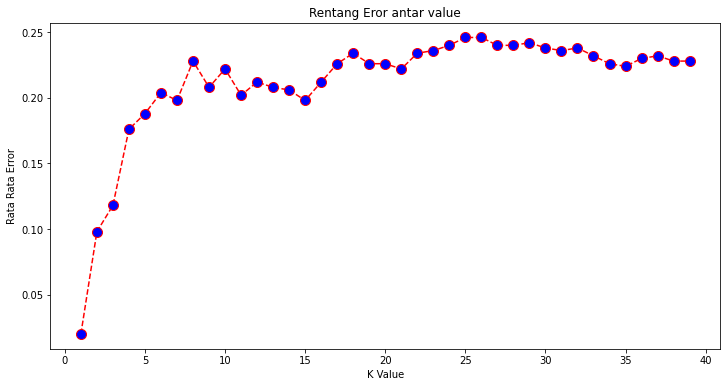

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', 
 markerfacecolor='blue', markersize=10)
plt.title('Rentang Eror antar value') 
plt.xlabel('K Value') 
plt.ylabel('Rata Rata Error')
plt.show()

In [21]:
#Training and Prediction
from sklearn.neighbors import KNeighborsClassifier #import library KNN from sklearn
classifier1 = KNeighborsClassifier(n_neighbors=1) #menentukan nilai k(banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
#Prediction
y_pred2 = classifier1.predict(x_test)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 1 0 0 0 1 

In [23]:
y_actual2=y_test.tolist()
y_pred2=y_pred2.tolist()

In [24]:
#Evaluate
print(ConfusionMatrix(y_actual2,y_pred2))

Predict   0         1         
Actual
0         316       5         

1         5         174       





Overall Statistics : 

95% CI                                                            (0.96773,0.99227)
ACC Macro                                                         0.98
ARI                                                               0.92095
AUNP                                                              0.97825
AUNU                                                              0.97825
Bangdiwala B                                                      0.96336
Bennett S                                                         0.96
CBA                                                               0.97825
CSI                                                               0.95649
Chi-Squared                                                       457.43724
Chi-Squared DF                                                    1
Conditional Entropy                                      